**L1.1 Парная линейная регрессия**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

In [ ]:
x.head()

,0
0,1.462108
1,1.133769
2,-2.301539
3,1.744812
4,0.042214


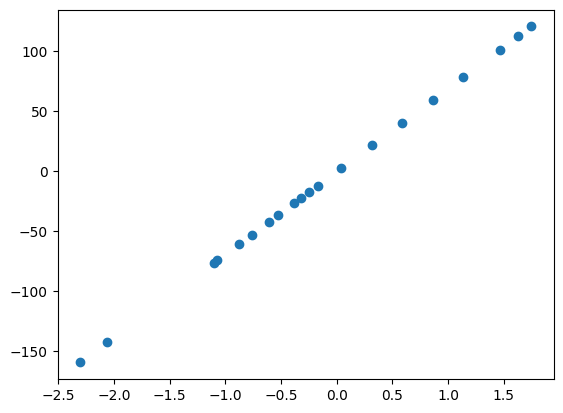

In [ ]:
plt.figure()
plt.scatter(x, y) # График зависимости одной переменной от другой
plt.show()

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self): # Определение коэффициентов линейной регрессии
        self.b0 = 2
        self.b1 = 1

    def predict(self, x):
      return self.b0 + self.b1 * x

    def error(self, X, Y):    #СКО
      return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def fit(self, X, Y):  # Обновление коэффициентов модели методом градиентного спуска
      alpha = 0.1
      dJ0 = sum(self.predict(X) - Y) /len(X)
      dJ1 = sum((self.predict(X) - Y) * X) /len(X)
      self.b0 -= alpha * dJ0
      self.b1 -= alpha * dJ1

In [ ]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J) # Начальная ошибка

2
102
initial error: 2873.527844047978


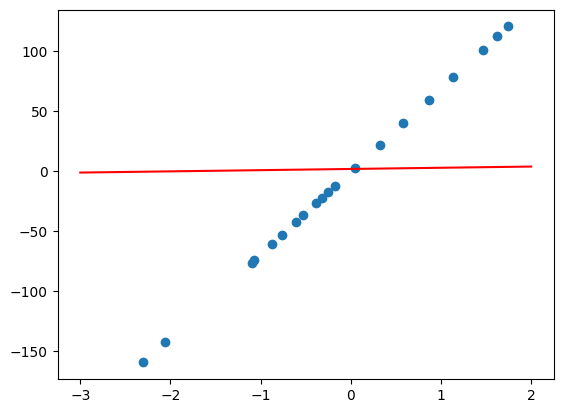

In [ ]:
X0 = np.linspace(-3, 2, 100) # График до обучения
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [ ]:
hyp.fit(x, y) # Обучение модели
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2201.4496904842617


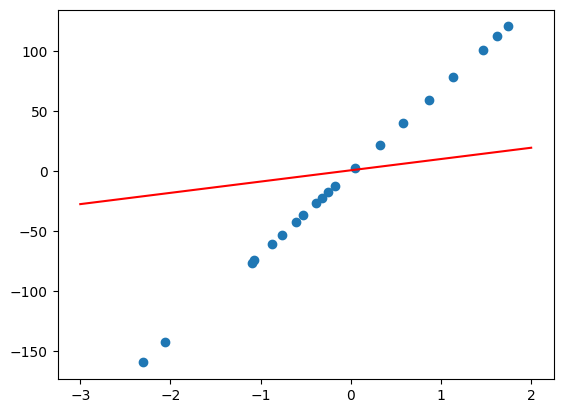

In [ ]:
X0 = np.linspace(-3, 2, 100) # График после обучения
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [ ]:
class Model(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):
        return sum((self.predict(X) - Y) ** 2) / (2 * len(Y))
    def fit(self, X, Y, alpha=0.001, accuracy=10**(-6), max_steps=5000):
        X = np.array(X)
        Y = np.array(Y)
        steps, errors = [], []
        step = 0
        for i in range(10000):
            dJ0 = sum(self.predict(X) - Y) / len(Y)
            dJ1 = sum((self.predict(X) - Y) * X) / len(Y)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [ ]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.7769753060572152e-06


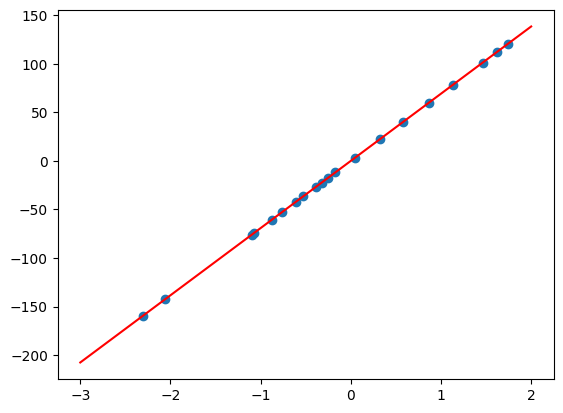

In [ ]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

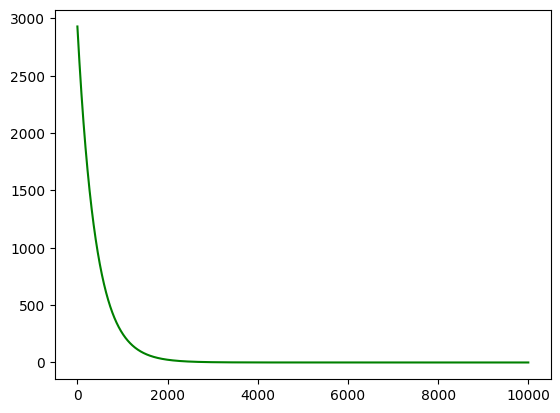

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

**L1.2 Множественная линейная регрессия на чистых данных**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_x.csv",
                header=None)
y = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_y.csv",
                header=None)

In [ ]:
x.head()

,0,1,2,3,4
0,0.071841,0.855352,-0.305597,0.028253,1.826895
1,0.139521,-0.423507,0.461059,-0.447400,-0.034988
2,1.626311,-0.257622,-0.697520,1.413219,1.086292
3,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
4,-0.783365,-0.861232,0.951448,-0.117306,0.680597


In [ ]:
x.shape, y.shape

((387, 5), (387, 1))

In [ ]:
binary = LinearRegression() # Модель парной регресии от одного признака
binary.fit(x[[1]], y)
binary.coef_

array([[95.52010745]])

In [ ]:
binary.predict(x[[1]]) # Рассчет теоретические значения признака

array([[  81.7066754 ],
       [ -40.45008468],
       [ -24.60472955],
       [ -78.92903986],
       [ -82.26167214],
       [  90.61516808],
       [   3.20559483],
       [ -27.39642608],
       [  77.03125467],
       [ -81.79074091],
       [ -57.11517633],
       [  71.55969853],
       [ -51.83704209],
       [  13.20326205],
       [ -20.052765  ],
       [ 125.1294343 ],
       [ -85.37964253],
       [ -67.97795874],
       [  62.50833807],
       [  67.06343892],
       [ -62.27425459],
       [ -80.86610767],
       [ -27.05138056],
       [ -52.78366471],
       [  35.41921651],
       [ -79.36741675],
       [  56.64287014],
       [  79.27353864],
       [ -35.49555901],
       [-221.02386024],
       [ -80.76607115],
       [ 165.15522994],
       [  32.58309404],
       [ -35.52849481],
       [ -96.01738449],
       [ -42.18812152],
       [ -48.92932082],
       [ -75.29745421],
       [  14.5207672 ],
       [  38.22303712],
       [  -5.81538928],
       [ -10.783

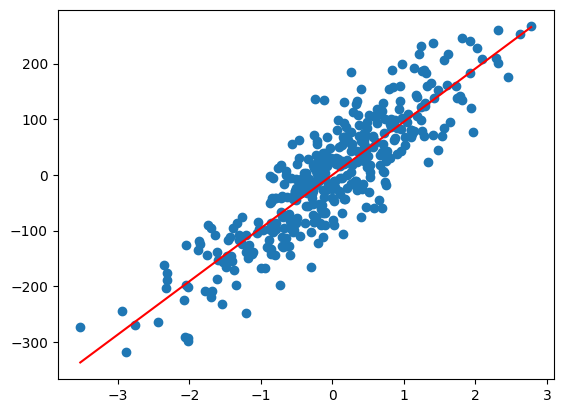

In [ ]:
plt.scatter(x[1], y)
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

In [ ]:
binary.score(x[[1]], y)

0.7699743283650629

In [ ]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

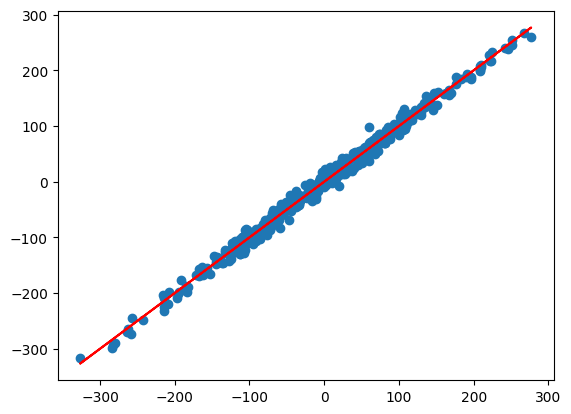

In [ ]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

**L1.3 Модели регрессии**

In [ ]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [ ]:
type(california)

sklearn.utils._bunch.Bunch

In [ ]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
print(type(california.data), type(california.target))
print(california.data.shape, california.target.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(20640, 8) (20640,)


In [ ]:
data = pd.DataFrame(california.data, columns = california.feature_names)
data['Price'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
data.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [ ]:
y = data['Price']
X = data.drop('Price', axis=1)
y.shape, X.shape

((20640,), (20640, 8))

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print("Coefficients: \n", model.coef_)
_ = [print(k, v) for k, v in zip(X.columns, model.coef_)]
print("Intercept: \n", model.intercept_)

Coefficients: 
 [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]
MedInc 0.4366932931343245
HouseAge 0.009435778033237972
AveRooms -0.10732204139090447
AveBedrms 0.645065693519812
Population -3.976389421211576e-06
AveOccup -0.003786542654971
Latitude -0.42131437752714385
Longitude -0.43451375467477743
Intercept: 
 -36.94192020718441


In [ ]:
y_pred = model.predict(X)
print(y_pred[:5])
print(y[:5])

[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744]
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


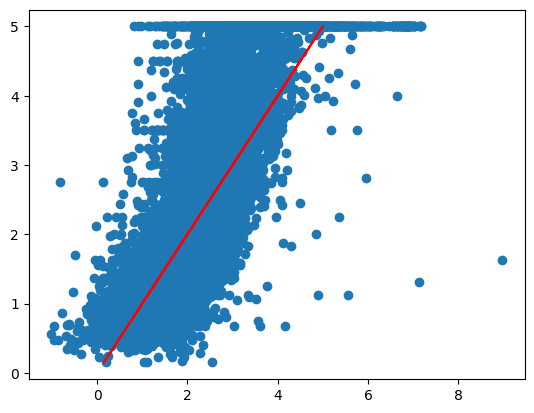

In [ ]:
plt.scatter(y_pred, y)
plt.plot(y, y, c='r')

In [ ]:
model.score(X, y)

0.606232685199805

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3).fit_transform(X)

In [ ]:
polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

In [ ]:
print(poly.shape)

(20640, 165)


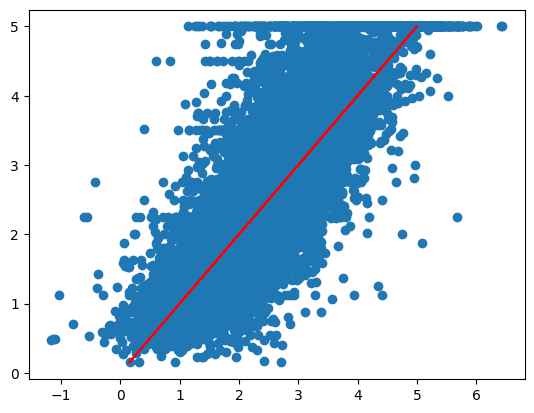

In [ ]:
plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')

In [ ]:
polynomial.score(poly, y)

0.3662918017753576

In [ ]:
EXAMPLE_VALUES="2311 2242 2315 2261 2313 2282 2367 2334 2347 2349 2409 2329 2324 2256 2279 2225 2227 2159 2215 2150 2214 2150 2165 2172 2226 2165 2217 2182 2129 2174 2202 2169 2221 2160 2223 2135 2243 2185 2256 2156 2176 2165 2149 2159 2176 2128 2174 2134 2160 2138 2193 2166 2199 2193 2176 2134 2171 2130 2128 2138 2178 2165 2160 2176 2243 2134 2197 2111 2139 2129 2150 2146 2099 2160 2193 2054 2082 2139 2672 3043 2315 2163 2179 2149 2178 2142 2163 2178 2176 2199 2245 2141 2258 2167 2208 2219 2342 2190 2233 2193"

import matplotlib.pyplot as plt
import sys

# Получаем данные из аргумента
data = list(map(int, \"$EXAMPLE_VALUES\".split()))

# Создаем временную ось (10 мс между точками)
time = [i * 0.01 for i in range(len(data))]  # 0.01 сек = 10 мс

# Настраиваем график
plt.figure(figsize=(10, 4))
plt.plot(time, data, 'b-o', markersize=4, linewidth=1)
plt.title('График данных (шаг 10 мс)')
plt.xlabel('Время, сек')
plt.ylabel('Значение')
plt.grid(True)

# Показываем график
plt.show()

SyntaxError: unexpected character after line continuation character (<ipython-input-1-b4e4c41ce5c1>, line 7)